In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [3]:
#importing or loading the dataset
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


1) Unnamed: 0 is index columns, so can be dropped
    
2) TV, radio, newsapaper distribution strategy feature coulmns are continuous in nature

3) Target variable sales is also continuous in nature

In [5]:
#Dropping of Unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#Checking data types
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All are float and continuous in nature

In [7]:
#Checkin for data shape
df.shape

(200, 4)

In [8]:
#Checking any null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

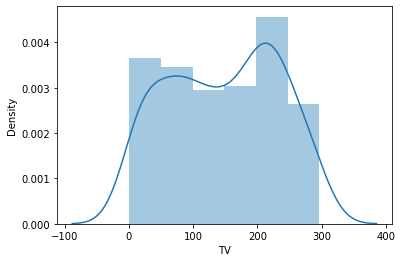

In [9]:
#Checking the distribution of data
sns.distplot(x = df['TV'])
plt.xlabel('TV')
plt.show()

We observe normal or guassian distribution in data with mean around 150 and litle bit left skewed data

This infers more money spent on TV ads (as range goes upto 300)

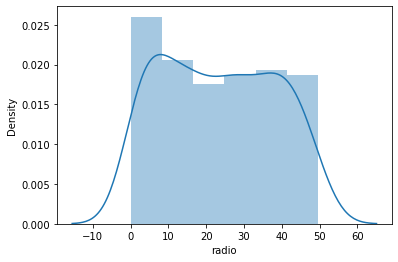

In [10]:
#Checking the distribution of data
sns.distplot(x = df['radio'])
plt.xlabel('radio')
plt.show()

We observe normal or guassian distribution in data with mean around 25 and litle bit right skewed data

This infers moderate money spent on Radio ads (as range goes upto 50)

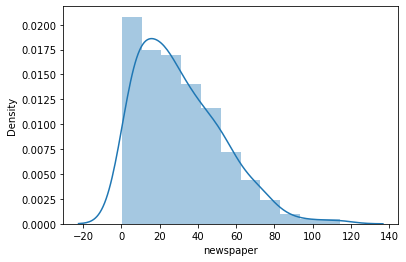

In [11]:
#Checking the distribution of data
sns.distplot(x = df['newspaper'])
plt.xlabel('newspaper')
plt.show()

We observe high density of data near zero, which means newspaper is less preferred channel among the 3 for advertising strategy

Also density decreases with higher values, which infers that newspaper was least preferred and less money is spent on newspaper ads

We observe data is highly right skewed

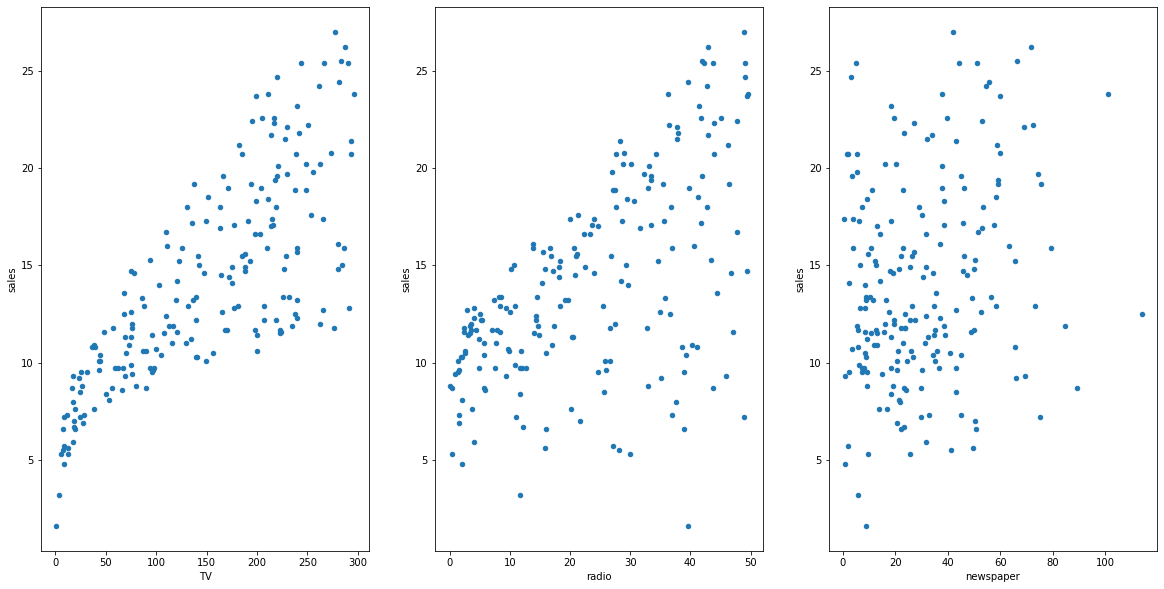

In [13]:
#Checking relation with target variable visually(bivariate analysis)
fig, axs = plt.subplots(1,3)

df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(20,10))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
plt.show()

Above graphs shows that all 3 channels ads have positive impact on sales

Among the 3, TV ads show strong relationship followed by radio and newspaper

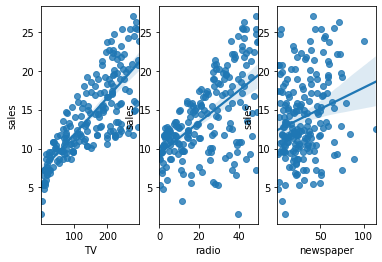

In [21]:
#Checking relation with target variable visually(bivariate analysis)
fig, axs = plt.subplots(1,3)
sns.regplot(x='TV', y='sales', data=df, ax=axs[0])
sns.regplot(x='radio', y='sales', data=df, ax=axs[1])
sns.regplot(x='newspaper', y='sales',data=df, ax=axs[2])

plt.show()

The above graph shows that positive correlation of 3 feature columns wrt sales is in the order TV > radio > newspaper

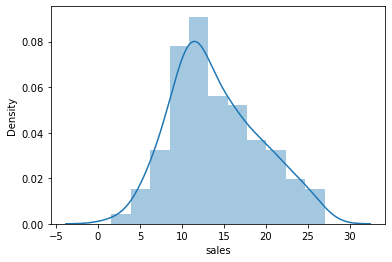

In [23]:
#Checking the distribution of data of target variable
sns.distplot(x = df['sales'])
plt.xlabel('sales')
plt.show()

We observe normal or guassian distribution in data with mean around 15 and litle bit right skewed data

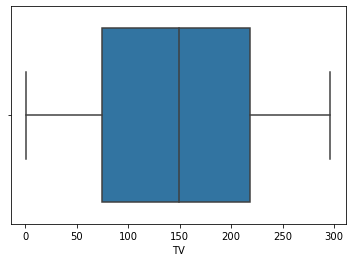

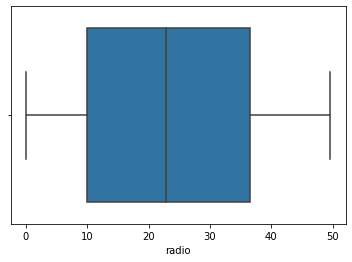

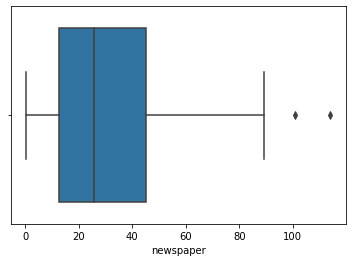

In [30]:
#Checking outliers in the input data
sns.boxplot(df['TV'])
plt.xlabel('TV')
plt.show()

sns.boxplot(df['radio'])
plt.xlabel('radio')
plt.show()

sns.boxplot(df['newspaper'])
plt.xlabel('newspaper')
plt.show()

No outliers present in TV and radio column

newspaper column has outliers, need to be handled before building or training the model

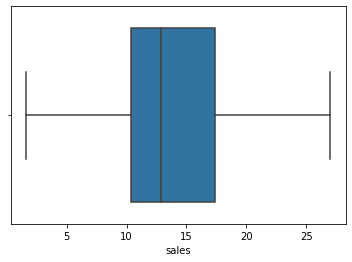

In [31]:
#Checking outliers in the target
sns.boxplot(df['sales'])
plt.xlabel('sales')
plt.show()

No outliers present in target column

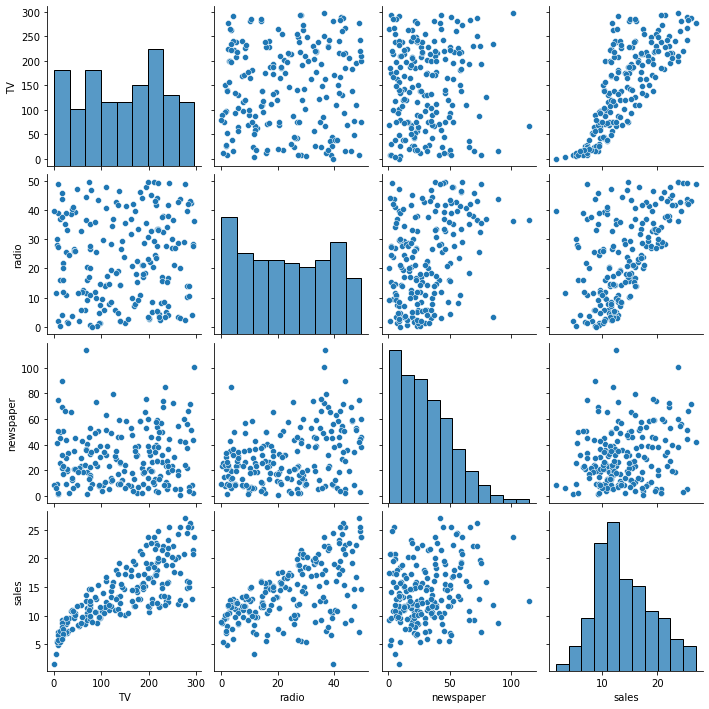

In [36]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

We can observe from the pairplot that newspaper and radio is having some kind of +ve relationship wrt each other

Later we shall observe its mutual corr from correlation data

In [25]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
#Statistical summary of the data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Mean value of money spent on ads for TV > newspaper > radio (147 > 30 > 23)

Max value of money spent on ads for TV > newspaper > radio (296 > 114 > 49)
    
This infers that TV is the most referred advertisement channel, followed by newspaper and then radio

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


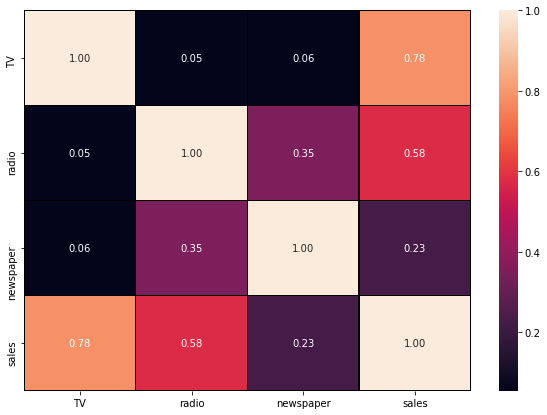

In [39]:
#Coefficient of correlation matrix
print(df.corr())

#Heatmap to vizualize correlation between different features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

TV is having high +ve corr with sales

Also we can observe that no strong relation mutually among 2 input features

So not concerned about multicollinearity, we can verify this point with VIF values before modelling

In [40]:
#Sorting descending values of correlation data of target variable
df.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [44]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

Shape before (200, 4)
Shape after (198, 4)


In [50]:
#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

1.0 % loss of data


In [58]:
#VIF method to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df[['TV','radio','newspaper']]
vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[2.486771835198193, 3.285462100162896, 3.0552445106573853]

VIF values are within limit

That is VIF < 5 for all feature columns

So no concern of multicollinearity

In [69]:
#Seperate feature and target columns
x = df_new.drop(columns=['sales'])
y = df_new['sales']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (198, 3)
y shape (198,)


In [70]:
#Checking skewness of data
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

skewness of newspaper column is not in permissible range i.e, +-0.5

So need to apply transformation to remove skewness

In [71]:
#Apply power transform to transform data
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
x_new = po.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)
x_new.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

Skewness within +-0.5 range, so we can proceed

In [73]:
#scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x_new)

This scaling step was not necessary as the PowerTransformer.fit_transform() has handled scalin  also

In [85]:
# Linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr,ytr)
    predytr = lr.predict(xtr)
    predyt = lr.predict(xt)
    
    if round(r2_score(ytr,predytr)*100,2) == round(r2_score(yt,predyt)*100,2):
             print('At RS',i,'Model preforms well')
             print('Train score =',(r2_score(ytr,predytr)*100))
             print('Test score =',(r2_score(yt,predyt)*100),'\n')

At RS 112 Model preforms well
Train score = 90.17428654220274
Test score = 90.1670836495268 

At RS 510 Model preforms well
Train score = 90.41100608643733
Test score = 90.41484328551748 



Therefore we train the model at random state 510

In [98]:
#Training the model at best random state
xtr, xt, ytr, yt = train_test_split(x,y, random_state=510,test_size=0.2)
lr.fit(xtr,ytr)
predytr = lr.predict(xtr)
predyt = lr.predict(xt)

print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 90.41484328551748 

Mean absolute error = 1.2782967281225788 

Root mean squared error = 1.687615832981815 



In [94]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score

predyt = lr.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(lr,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9028367967872095 

At CV = 2
CV score = 0.9017064197605746 

At CV = 3
CV score = 0.8973645562112824 

At CV = 4
CV score = 0.8986654359289576 

At CV = 5
CV score = 0.8958270968555071 

At CV = 6
CV score = 0.8987009469201537 

At CV = 7
CV score = 0.894944294999198 

At CV = 8
CV score = 0.8980187277212 

At CV = 9
CV score = 0.8938982316418994 

At CV = 10
CV score = 0.8958208927116633 



At CV = 2, R2 score almost equal to CV score. This infers that there is no issue of overfitting

In [97]:
# Lasso regression
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtr,ytr)
predyt = model.predict(xt)
testscore = r2_score(yt, predyt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 83.7684778556817 

Mean absolute error = 1.60727495709181 

Root mean squared error = 2.146427540720342 



In [100]:
#Hyperparameter tuning of Lasso model
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 'random_state':list(range(0,20)), 'selection':['cyclic', 'random']}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Lasso(alpha=0.1, random_state=15, selection='random')


In [101]:
#Trainig model as per best parameters
model = Lasso(alpha=0.1, random_state=15, selection='random')
model.fit(xtr,ytr)
predyt = model.predict(xt)
testscore = r2_score(yt, predyt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 90.73440742359924 

Mean absolute error = 1.2554733427618345 

Root mean squared error = 1.6592452464354188 



Improved Test r2 score observed in Lasso regression model after parameter tuning. Let us do cross validate for checking of overfitting

In [104]:
#Cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,6):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9073440742359924 

At CV = 2
CV score = 0.9014616010485529 

At CV = 3
CV score = 0.8971304617102623 

At CV = 4
CV score = 0.8980857427860307 

At CV = 5
CV score = 0.8957805016075945 



At CV = 2, R2 score almost equal to CV score (difference 0.006). This infers that there is no issue of overfitting

In [105]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
testscore = r2_score(yt, predyt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 98.45314028155933 

Mean absolute error = 0.5454250000000005 

Root mean squared error = 0.6779527822791183 



In [107]:
#Cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9845314028155933 

At CV = 2
CV score = 0.9713623828437447 

At CV = 3
CV score = 0.9734408961751763 

At CV = 4
CV score = 0.9771417824012166 

At CV = 5
CV score = 0.9767828883680142 

At CV = 6
CV score = 0.9768470557365715 

At CV = 7
CV score = 0.9761461401903446 

At CV = 8
CV score = 0.9773869142818086 

At CV = 9
CV score = 0.9773287854637904 

At CV = 10
CV score = 0.9774962756054826 



At CV = 10, R2 score of model and CV score difference is minimal (0.007). This infers that there is no issue of overfitting

In [108]:
#Hyper parameter tuning for random forest regressor
model = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'max_features' : ["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=50)


In [109]:
#Trainig model as per best parameters
model = RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=50)
model.fit(xtr,ytr)
predyt = model.predict(xt)
testscore = r2_score(yt, predyt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 98.48125532172679 

Mean absolute error = 0.5250749999999994 

Root mean squared error = 0.6717634442272058 



In [110]:
#Again cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9848125532172679 

At CV = 2
CV score = 0.9709623809406274 

At CV = 3
CV score = 0.9744469251835449 

At CV = 4
CV score = 0.9773705867580067 

At CV = 5
CV score = 0.9755353196436716 

At CV = 6
CV score = 0.9778146634137678 

At CV = 7
CV score = 0.9775409620804397 

At CV = 8
CV score = 0.9778801501436125 

At CV = 9
CV score = 0.9776312211415965 

At CV = 10
CV score = 0.9794789197765154 



At CV = 10, R2 score of model and CV score difference is minimal (0.006). This infers that there is no issue of overfitting

In [111]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))))

Test score in percentage = 95.42205289922627 

Mean absolute error = 0.8825 

Root mean squared error = 1.166297560659371


In [112]:
#Cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9542205289922627 

At CV = 2
CV score = 0.9226696049186223 

At CV = 3
CV score = 0.9418079542442269 

At CV = 4
CV score = 0.9370582646851165 

At CV = 5
CV score = 0.9488147636252352 

At CV = 6
CV score = 0.9383334600455656 

At CV = 7
CV score = 0.9443322534398316 

At CV = 8
CV score = 0.943613443909307 

At CV = 9
CV score = 0.9336645022473967 

At CV = 10
CV score = 0.9521640796191818 



At CV = 10, R2 score of model and CV score difference is minimal(i.e, 0.002). This infers that there is no issue of overfitting

In [123]:
#Hyper parameter tuning for decesion tree regressor
parameters = {'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'splitter' : ["best", "random"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10)


In [124]:
#Trainig model as per best parameters
model = DecisionTreeRegressor(criterion='absolute_error', max_depth=10)
model.fit(xtr,ytr)
predyt = model.predict(xt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 96.2272532990499 

Mean absolute error = 0.8550000000000001 

Root mean squared error = 1.058772874605314 



In [125]:
#Again cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9622725329904991 

At CV = 2
CV score = 0.9180663639979634 

At CV = 3
CV score = 0.9342293745104066 

At CV = 4
CV score = 0.9509173644257067 

At CV = 5
CV score = 0.9423963375093631 

At CV = 6
CV score = 0.9556148313910106 

At CV = 7
CV score = 0.9464882159071308 

At CV = 8
CV score = 0.9496753231620177 

At CV = 9
CV score = 0.9423532312173251 

At CV = 10
CV score = 0.9563089388581052 



At CV = 10, R2 score of model and CV score difference is minimal (i.e, 0.006). This infers that there is no issue of overfitting

In [127]:
# Support vector regressor
from sklearn.svm import SVR
model = SVR()
model.fit(xtr,ytr)
predyt = model.predict(xt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 89.99635658040087 

Mean absolute error = 1.0426697250154369 

Root mean squared error = 1.7240628100243065 



In [130]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))))

Test score in percentage = 98.79144119246853 

Mean absolute error = 0.4553786286505982 

Root mean squared error = 0.5992497701631886


In [129]:
#Cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9879680719768894 

At CV = 2
CV score = 0.9740293542637286 

At CV = 3
CV score = 0.976985821377114 

At CV = 4
CV score = 0.9792181275510762 

At CV = 5
CV score = 0.9782231379184643 

At CV = 6
CV score = 0.9770155497833127 

At CV = 7
CV score = 0.9772390867015815 

At CV = 8
CV score = 0.9790992421406821 

At CV = 9
CV score = 0.9768292175839037 

At CV = 10
CV score = 0.9791064258154669 



At CV = 4, R2 score of model and CV score difference is minimal (i.e, 0.008). This infers that there is no issue of overfitting

In [137]:
# Hyper parameter tuning of Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              'n_estimators':[100,150,200], 
              'max_depth' : [4,6,8]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='mae', max_depth=4, n_estimators=200)


In [141]:
#Trainig model as per best parameters
model = GradientBoostingRegressor(criterion='mae', max_depth=4, n_estimators=200)
model.fit(xtr,ytr)
predyt = model.predict(xt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = 98.12003845984401 

Mean absolute error = 0.6044994539157375 

Root mean squared error = 0.7473920339340577 



In [142]:
#Again cross validation to check overfitting
predyt = model.predict(xt)
lss = r2_score(yt, predyt)
print('r2_score of test =',lss,'\n')

for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')

r2_score of test = 0.9812003845984402 

At CV = 2
CV score = 0.9694273477248374 

At CV = 3
CV score = 0.9751964370753335 

At CV = 4
CV score = 0.9792843465422437 

At CV = 5
CV score = 0.9755027891439736 

At CV = 6
CV score = 0.97668188630088 

At CV = 7
CV score = 0.9765129003173484 

At CV = 8
CV score = 0.9781667680613936 

At CV = 9
CV score = 0.9763568677058702 

At CV = 10
CV score = 0.9800780499038246 



At CV = 10, R2 score of model and CV score difference is minimal (i.e, 0.001). This infers that there is no issue of overfitting

Therefore Gradient boosting regressor model has given best performance

Test score in percentage = 98.12003845984401 

Mean absolute error = 0.6044994539157375 

Root mean squared error = 0.7473920339340577

And difference between CV score and R2score of Test data is minimal (0.001) observed after hyperparameter tuning

So we shall slect this model for saving

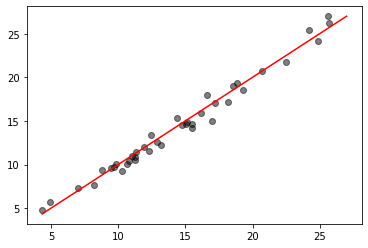

In [161]:
#Predicted data vs actual test data
predyt = model.predict(xt)
actualyt = yt
plt.figure()
plt.scatter(predyt, actualyt, color = 'k', alpha=0.5)
plt.plot([min(predyt),max(actualyt)], [min(predyt),max(actualyt)], 'k-', color = 'r')
plt.show()

In [162]:
import pickle
filename='advertise.pkl'
pickle.dump(model,open(filename,'wb'))